Metin Abadan - 19050111015

Sertac İnce - 20050111003

# Polynomial regression

Importing libraries and splitting data

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("HW4Data.csv")

In [3]:
df.tail()

,Days,Corn_NDVI_2013,Cotton_NDVI_2013,Soybean_NDVI_2013,Corn_NDVI_2014,Cotton_NDVI_2014,Soybean_NDVI_2014,Corn_MSAVI_2013,Cotton_MSAVI_2013,Soybean_MSAVI_2013,Corn_MSAVI_2014,Cotton_MSAVI_2014,Soybean_MSAVI_2014
159,275,0.165292,0.518346,0.461980,0.165432,0.455796,0.574145,0.282787,0.669671,0.595246,0.282014,0.617797,0.712689
160,276,0.164498,0.509941,0.447632,0.162055,0.441938,0.557055,0.281647,0.662383,0.582146,0.277008,0.603580,0.697083
161,277,0.163704,0.501536,0.433283,0.158678,0.428081,0.539965,0.280508,0.655096,0.569046,0.272002,0.589363,0.681478
162,278,0.162910,0.493131,0.418935,0.155301,0.414223,0.522876,0.279369,0.647808,0.555945,0.266996,0.575146,0.665872
163,279,0.162116,0.484727,0.404587,0.151924,0.400365,0.505786,0.278229,0.640521,0.542845,0.261989,0.560929,0.650266


In [3]:
days = df["Days"]

ndvi_corn13 = df["Corn_NDVI_2013"]
ndvi_cotton13 = df["Cotton_NDVI_2013"]
ndvi_soybean13 = df["Soybean_NDVI_2013"]

ndvi_corn14 = df["Corn_NDVI_2014"]
ndvi_cotton14 = df["Cotton_NDVI_2014"]
ndvi_soybean14 = df["Soybean_NDVI_2014"]

msavi_corn13 = df["Corn_MSAVI_2013"]
msavi_cotton13 = df["Cotton_MSAVI_2013"]
msavi_soybean13 = df["Soybean_MSAVI_2013"]

msavi_corn14 = df["Corn_MSAVI_2014"]
msavi_cotton14 = df["Cotton_MSAVI_2014"]
msavi_soybean14 = df["Soybean_MSAVI_2014"]

# QUESTION 1

Fit curves to corn, cotton, and soybean’s NDVI vs days. In 2013. Manually

### Corn NDVI vs Days Manual Solution

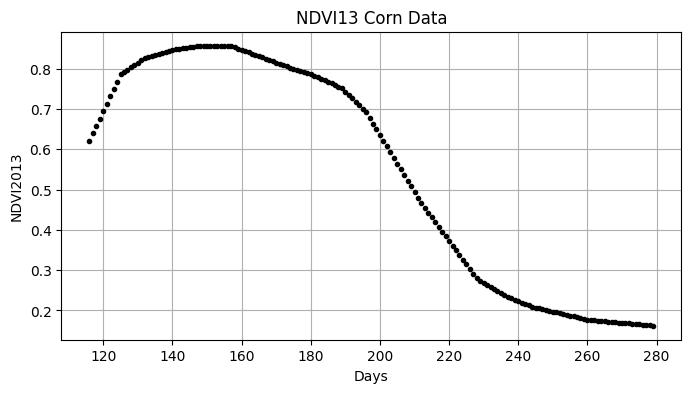

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(days, ndvi_corn13, "k.")
plt.title("NDVI13 Corn Data")
plt.grid()

plt.xlabel("Days")
plt.ylabel("NDVI2013");

In [146]:
n = 164
b0 = 0.4497;
b1 = 0.007;
b2 = -0.00003;
noiseLevel = 1
noise = np.random.normal(-noiseLevel, noiseLevel, n)

y = b0 + b1 * days + b2 * (days**2) 

In [147]:
x1 = days
x2 = days**2

In [148]:

X = np.column_stack((x1,x2))
X_b = np.c_[np.ones((n, 1)), X]

In [149]:

w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('[beta0, beta1, beta2] = ', w_estimate)

[beta0, beta1, beta2] =  [ 4.497e-01  7.000e-03 -3.000e-05]


In [163]:
y_hat1 = X_b.dot(w_estimate)
y_hat1

array([0.85802, 0.85803, 0.85798, 0.85787, 0.8577 , 0.85747, 0.85718,
       0.85683, 0.85642, 0.85595, 0.85542, 0.85483, 0.85418, 0.85347,
       0.8527 , 0.85187, 0.85098, 0.85003, 0.84902, 0.84795, 0.84682,
       0.84563, 0.84438, 0.84307, 0.8417 , 0.84027, 0.83878, 0.83723,
       0.83562, 0.83395, 0.83222, 0.83043, 0.82858, 0.82667, 0.8247 ,
       0.82267, 0.82058, 0.81843, 0.81622, 0.81395, 0.81162, 0.80923,
       0.80678, 0.80427, 0.8017 , 0.79907, 0.79638, 0.79363, 0.79082,
       0.78795, 0.78502, 0.78203, 0.77898, 0.77587, 0.7727 , 0.76947,
       0.76618, 0.76283, 0.75942, 0.75595, 0.75242, 0.74883, 0.74518,
       0.74147, 0.7377 , 0.73387, 0.72998, 0.72603, 0.72202, 0.71795,
       0.71382, 0.70963, 0.70538, 0.70107, 0.6967 , 0.69227, 0.68778,
       0.68323, 0.67862, 0.67395, 0.66922, 0.66443, 0.65958, 0.65467,
       0.6497 , 0.64467, 0.63958, 0.63443, 0.62922, 0.62395, 0.61862,
       0.61323, 0.60778, 0.60227, 0.5967 , 0.59107, 0.58538, 0.57963,
       0.57382, 0.56

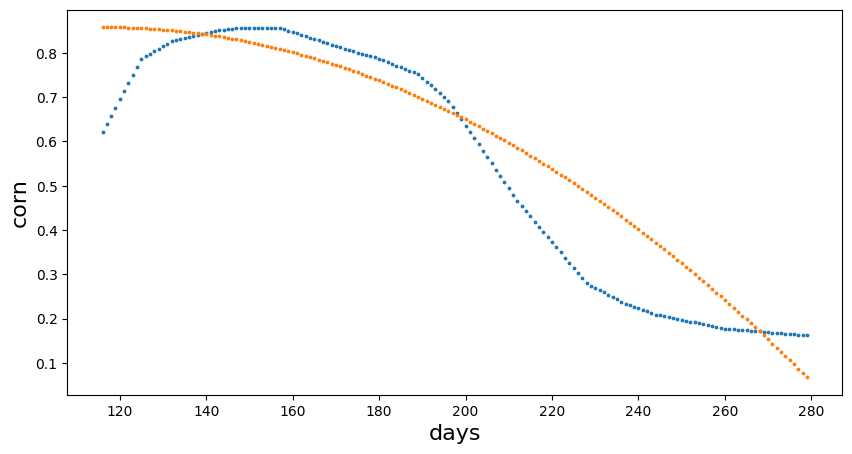

In [164]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(days, ndvi_corn13, s = 3)
plt.scatter(days, y_hat1, s = 3)


plt.xlabel('days', fontsize=16)
plt.ylabel('corn', fontsize=16)
plt.show()

In [181]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(ndvi_corn13, y_hat1))
print(mean_squared_error(ndvi_corn13, y_hat1))

0.8593246461274973
0.010553647059652069


### Cotton NDVI vs Days Manual Solution

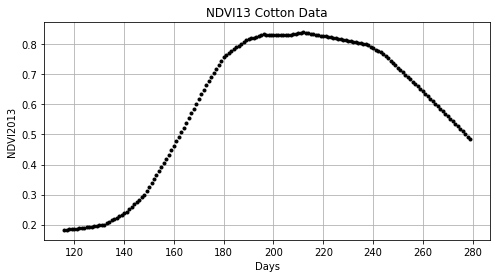

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(days, ndvi_cotton13, "k.")
plt.title("NDVI13 Cotton Data")
plt.grid()

plt.xlabel("Days")
plt.ylabel("NDVI2013");

In [ ]:
n = 164
b0_cotton = -3.0582;
b1_cotton = 0.0357;
b2_cotton = -0.00008;
y_cotton = b0_cotton + b1_cotton * days + b2_cotton * (days**2) 

In [ ]:
x1 = days
x2 = days**2

In [ ]:

X = np.column_stack((x1,x2))
X_b = np.c_[np.ones((n, 1)), X]

In [ ]:

w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_cotton)
print('[beta0, beta1, beta2] = ', w_estimate)

[beta0, beta1, beta2] =  [-3.0582e+00  3.5700e-02 -8.0000e-05]


In [ ]:
y_hat1_cotton = X_b.dot(w_estimate)
y_hat1_cotton

array([0.00652, 0.02358, 0.04048, 0.05722, 0.0738 , 0.09022, 0.10648,
       0.12258, 0.13852, 0.1543 , 0.16992, 0.18538, 0.20068, 0.21582,
       0.2308 , 0.24562, 0.26028, 0.27478, 0.28912, 0.3033 , 0.31732,
       0.33118, 0.34488, 0.35842, 0.3718 , 0.38502, 0.39808, 0.41098,
       0.42372, 0.4363 , 0.44872, 0.46098, 0.47308, 0.48502, 0.4968 ,
       0.50842, 0.51988, 0.53118, 0.54232, 0.5533 , 0.56412, 0.57478,
       0.58528, 0.59562, 0.6058 , 0.61582, 0.62568, 0.63538, 0.64492,
       0.6543 , 0.66352, 0.67258, 0.68148, 0.69022, 0.6988 , 0.70722,
       0.71548, 0.72358, 0.73152, 0.7393 , 0.74692, 0.75438, 0.76168,
       0.76882, 0.7758 , 0.78262, 0.78928, 0.79578, 0.80212, 0.8083 ,
       0.81432, 0.82018, 0.82588, 0.83142, 0.8368 , 0.84202, 0.84708,
       0.85198, 0.85672, 0.8613 , 0.86572, 0.86998, 0.87408, 0.87802,
       0.8818 , 0.88542, 0.88888, 0.89218, 0.89532, 0.8983 , 0.90112,
       0.90378, 0.90628, 0.90862, 0.9108 , 0.91282, 0.91468, 0.91638,
       0.91792, 0.91

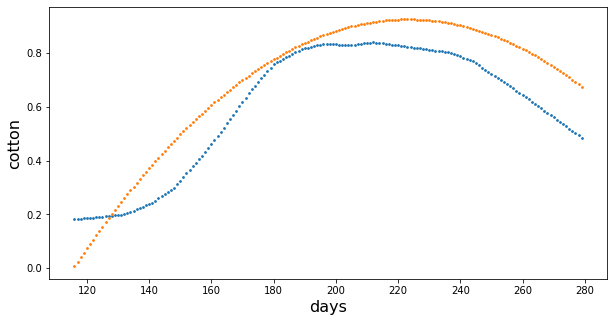

In [ ]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(days, ndvi_cotton13, s = 3)
plt.scatter(days, y_hat1_cotton, s = 3)


plt.xlabel('days', fontsize=16)
plt.ylabel('cotton', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_score(ndvi_cotton13, y_hat1_cotton)

0.735703257557916

### Soybean NDVI vs Days Manual Solution

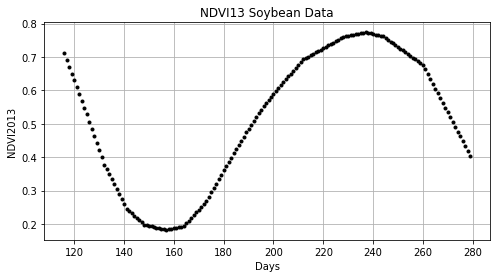

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(days, ndvi_soybean13, "k.")
plt.title("NDVI13 Soybean Data")
plt.grid()

plt.xlabel("Days")
plt.ylabel("NDVI2013");

In [ ]:
n = 164
b0_soybean = -0.0185;
b1_soybean = 0.0028;
b2_soybean = -0.0000006;
y_soybean = b0_soybean + b1_soybean * days + b2_soybean * (days**2) 

In [ ]:
x1 = days
x2 = days**2

In [ ]:

X = np.column_stack((x1,x2))
X_b = np.c_[np.ones((n, 1)), X]

In [ ]:

w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_soybean)
print('[beta0, beta1, beta2] = ', w_estimate)

[beta0, beta1, beta2] =  [-1.85e-02  2.80e-03 -6.00e-07]


In [ ]:
y_hat1_soybean = X_b.dot(w_estimate)
y_hat1_soybean

array([0.2982264, 0.3008866, 0.3035456, 0.3062034, 0.30886  , 0.3115154,
       0.3141696, 0.3168226, 0.3194744, 0.322125 , 0.3247744, 0.3274226,
       0.3300696, 0.3327154, 0.33536  , 0.3380034, 0.3406456, 0.3432866,
       0.3459264, 0.348565 , 0.3512024, 0.3538386, 0.3564736, 0.3591074,
       0.36174  , 0.3643714, 0.3670016, 0.3696306, 0.3722584, 0.374885 ,
       0.3775104, 0.3801346, 0.3827576, 0.3853794, 0.388    , 0.3906194,
       0.3932376, 0.3958546, 0.3984704, 0.401085 , 0.4036984, 0.4063106,
       0.4089216, 0.4115314, 0.41414  , 0.4167474, 0.4193536, 0.4219586,
       0.4245624, 0.427165 , 0.4297664, 0.4323666, 0.4349656, 0.4375634,
       0.44016  , 0.4427554, 0.4453496, 0.4479426, 0.4505344, 0.453125 ,
       0.4557144, 0.4583026, 0.4608896, 0.4634754, 0.46606  , 0.4686434,
       0.4712256, 0.4738066, 0.4763864, 0.478965 , 0.4815424, 0.4841186,
       0.4866936, 0.4892674, 0.49184  , 0.4944114, 0.4969816, 0.4995506,
       0.5021184, 0.504685 , 0.5072504, 0.5098146, 

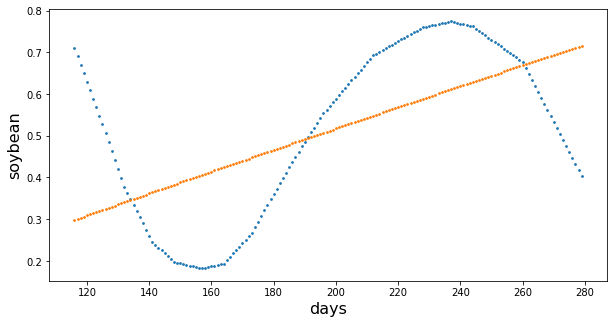

In [ ]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(days, ndvi_soybean13, s = 3)
plt.scatter(days, y_hat1_soybean, s = 3)


plt.xlabel('days', fontsize=16)
plt.ylabel('soybean', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_score(ndvi_soybean13, y_hat1_soybean)

0.3607964852464042

### Corn NDVI vs Days Sklearn Solution

In [200]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = days[:,np.newaxis]
poly_regression.fit(x_input, ndvi_corn13)
y_hat2 = poly_regression.predict(x_input)

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\1739201698.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = days[:,np.newaxis]


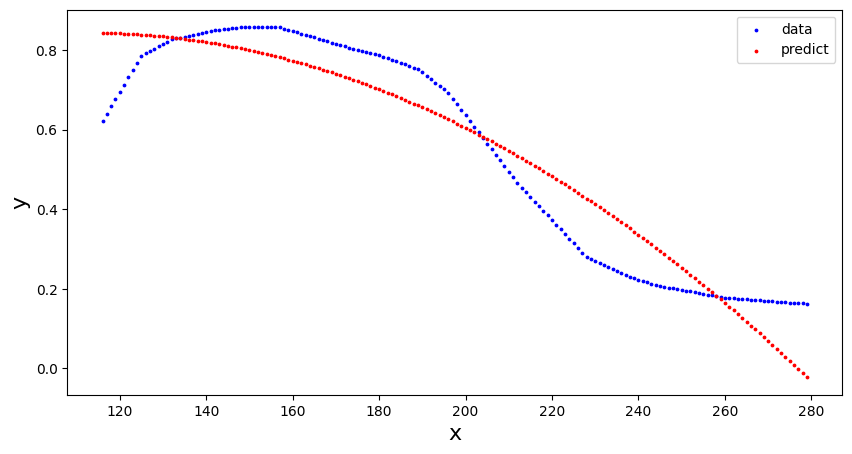

In [201]:
# plotting generated dataset
plt.figure(figsize=(10, 5))

data = plt.scatter(days, ndvi_corn13, s = 3, color='blue')
predict = plt.scatter(days, y_hat2, s = 3, color='red')
plt.legend((data, predict), ("data", "predict"))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [170]:

r2_score(ndvi_corn13, y_hat2)

0.8593246461274974

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

errorArr = {}

for m in range(0, 10):
    poly_regression = Pipeline([
        ("poly", PolynomialFeatures(degree=m)),
        ("lin_reg", LinearRegression())
    ])

    x_input = days[:,np.newaxis]
    poly_regression.fit(x_input, ndvi_corn13[:,np.newaxis])
    y_hat3 = poly_regression.predict(x_input)

    errorArr[m] = r2_score(ndvi_corn13, y_hat3)

In [198]:
errorArr

{0: 0.0,
 1: 0.8429853896233447,
 2: 0.8951413554630554,
 3: 0.9900208533330819,
 4: 0.9910981864869792,
 5: 0.9925468656337619,
 6: 0.9935449023652468,
 7: 0.9942809402077757,
 8: 0.9946101027901835,
 9: 0.9946077301468659}

as we can see, best degree is 3 

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\2091619709.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = days[:,np.newaxis]


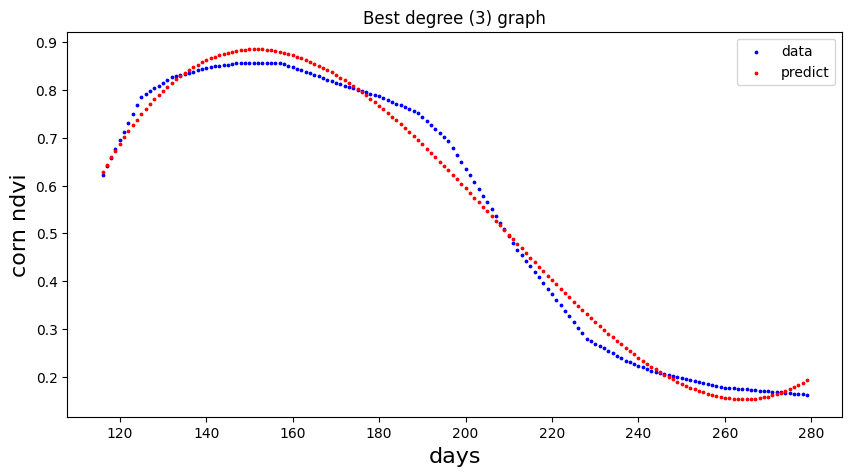

In [202]:
# plotting generated dataset


poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("lin_reg", LinearRegression())
])

x_input = days[:,np.newaxis]
poly_regression.fit(x_input, ndvi_corn13)
y_hat4 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(days, ndvi_corn13, s = 3, color='blue')
predict = plt.scatter(days, y_hat4, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))

plt.title("Best degree (3) graph")
plt.xlabel('days', fontsize=16)
plt.ylabel('corn ndvi', fontsize=16)
plt.show()

### Cotton NDVI vs Days Sklearn Solution

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input2 = days[:,np.newaxis]
poly_regression.fit(x_input2, ndvi_cotton13)
y_hat4 = poly_regression.predict(x_input2)

C:\Users\sertac\AppData\Local\Temp\ipykernel_9780\1876888747.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input2 = days[:,np.newaxis]


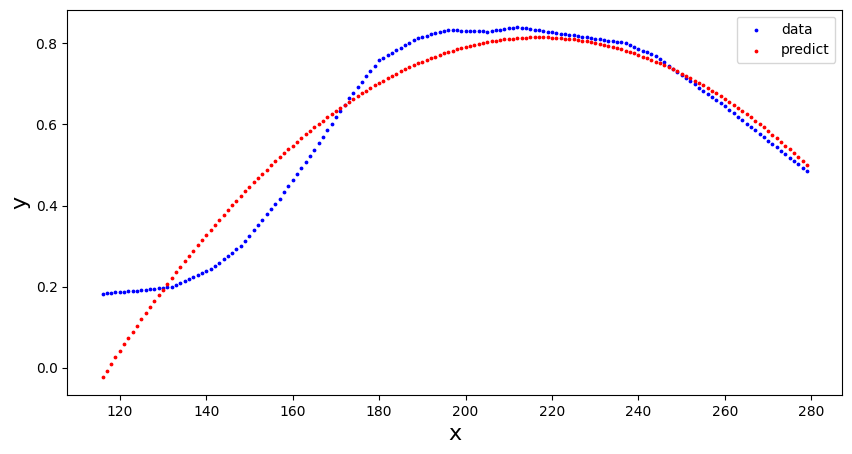

In [9]:
# plotting generated dataset
plt.figure(figsize=(10, 5))

data = plt.scatter(days, ndvi_cotton13, s = 3, color='blue')
predict = plt.scatter(days, y_hat4, s = 3, color='red')
plt.legend((data, predict), ("data", "predict"))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [10]:

r2_score(ndvi_cotton13, y_hat4)

0.9303184756151961

In [11]:
mean_squared_error(ndvi_cotton13, y_hat4)

0.003762643930048956

In [ ]:
errorArr2 = {}

for m in range(0, 20):
    poly_regression2 = Pipeline([
        ("poly", PolynomialFeatures(degree=m)),
        ("lin_reg", LinearRegression())
    ])

    x_input3 = days[:,np.newaxis]
    poly_regression2.fit(x_input3, ndvi_cotton13[:,np.newaxis])
    y_hat5 = poly_regression2.predict(x_input3)

    errorArr2[m] = r2_score(ndvi_cotton13, y_hat5)

In [15]:
errorArr2

{0: 0.0,
 1: 0.4267747887347241,
 2: 0.9303184756151961,
 3: 0.9551532011511836,
 4: 0.9880871028922825,
 5: 0.9934500661047864,
 6: 0.9941072291427894,
 7: 0.9932782457393095,
 8: 0.9906165812696379,
 9: 0.9867848716899289,
 10: 0.983257282365006,
 11: 0.9816072559737965,
 12: 0.9826168720186448,
 13: 0.9856655664814409,
 14: 0.9887171688472298,
 15: 0.9889031356993242,
 16: 0.9833991548267503,
 17: 0.970194923989092,
 18: 0.9484878115874342,
 19: 0.9186605111642133}

as we can see, best degree is 5

C:\Users\sertac\AppData\Local\Temp\ipykernel_9780\3971054813.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = days[:,np.newaxis]


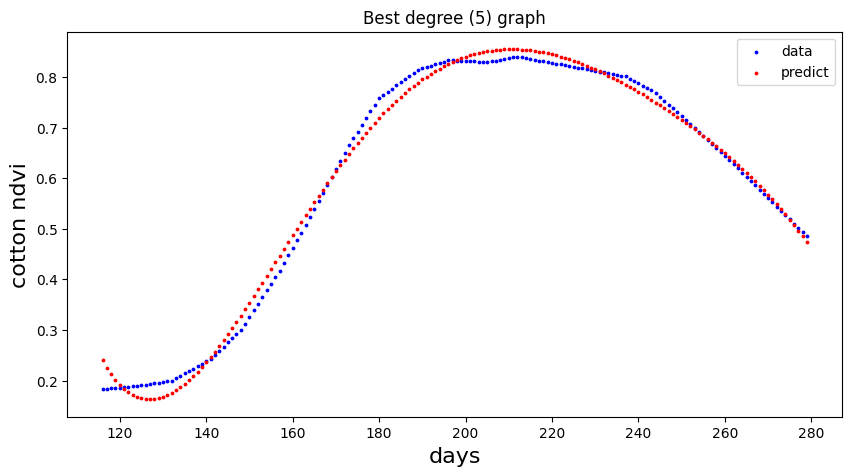

In [16]:
# plotting generated dataset


poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=5)),
    ("lin_reg", LinearRegression())
])

x_input = days[:,np.newaxis]
poly_regression.fit(x_input, ndvi_cotton13)
y_hat5 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(days, ndvi_cotton13, s = 3, color='blue')
predict = plt.scatter(days, y_hat5, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))

plt.title("Best degree (5) graph")
plt.xlabel('days', fontsize=16)
plt.ylabel('cotton ndvi', fontsize=16)
plt.show()

### Soybean NDVI vs Days Sklearn Solution

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input3 = days[:,np.newaxis]
poly_regression.fit(x_input3, ndvi_soybean13)
y_hat5 = poly_regression.predict(x_input3)

C:\Users\sertac\AppData\Local\Temp\ipykernel_9780\2279318687.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input3 = days[:,np.newaxis]


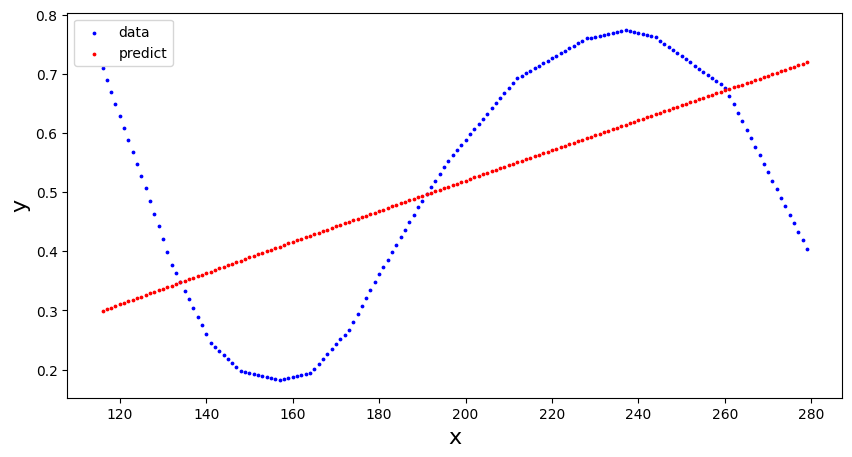

In [18]:
# plotting generated dataset
plt.figure(figsize=(10, 5))

data = plt.scatter(days, ndvi_soybean13, s = 3, color='blue')
predict = plt.scatter(days, y_hat5, s = 3, color='red')
plt.legend((data, predict), ("data", "predict"))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [19]:

r2_score(ndvi_soybean13, y_hat5)

0.3609421202367338

In [20]:
mean_squared_error(ndvi_soybean13, y_hat5)

0.026373626102822522

In [ ]:
errorArr3 = {}

for m in range(0, 20):
    poly_regression2 = Pipeline([
        ("poly", PolynomialFeatures(degree=m)),
        ("lin_reg", LinearRegression())
    ])

    x_input3 = days[:,np.newaxis]
    poly_regression2.fit(x_input3, ndvi_soybean13[:,np.newaxis])
    y_hat6= poly_regression2.predict(x_input3)

    errorArr3[m] = r2_score(ndvi_soybean13, y_hat6)

In [24]:
errorArr3

{0: 0.0,
 1: 0.3609088067519566,
 2: 0.3609421202367338,
 3: 0.9730191722538424,
 4: 0.9925680635773931,
 5: 0.9943594232273667,
 6: 0.9945898904158764,
 7: 0.9961531925499685,
 8: 0.9974161336713063,
 9: 0.9952180930697619,
 10: 0.9858871883771765,
 11: 0.9667500525706376,
 12: 0.9374196027887853,
 13: 0.9002233263375149,
 14: 0.859564533123479,
 15: 0.8205446721514507,
 16: 0.7874949359146746,
 17: 0.763000543810382,
 18: 0.7476548360071036,
 19: 0.7404161820287145}

as we can see, best degree is 4

C:\Users\sertac\AppData\Local\Temp\ipykernel_9780\994210331.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = days[:,np.newaxis]


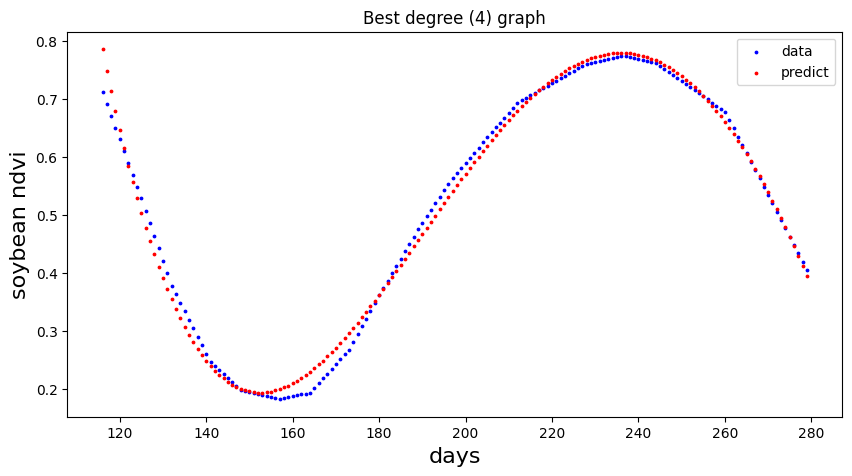

In [26]:
# plotting generated dataset


poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=4)),
    ("lin_reg", LinearRegression())
])

x_input = days[:,np.newaxis]
poly_regression.fit(x_input, ndvi_soybean13)
y_hat5 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(days, ndvi_soybean13, s = 3, color='blue')
predict = plt.scatter(days, y_hat5, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))

plt.title("Best degree (4) graph")
plt.xlabel('days', fontsize=16)
plt.ylabel('soybean ndvi', fontsize=16)
plt.show()

# QUESTION 2

### NDVI vs MSAVI for Corn

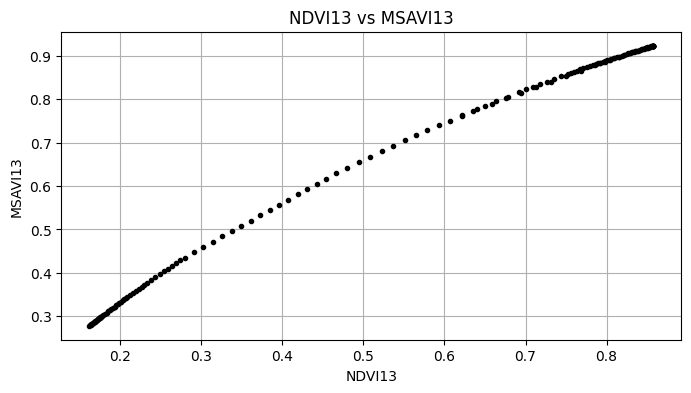

In [203]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_corn13, msavi_corn13, "k.")
plt.title("NDVI13 vs MSAVI13")
plt.grid()

plt.xlabel("NDVI13")
plt.ylabel("MSAVI13");

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\347830956.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = ndvi_corn13[:,np.newaxis]


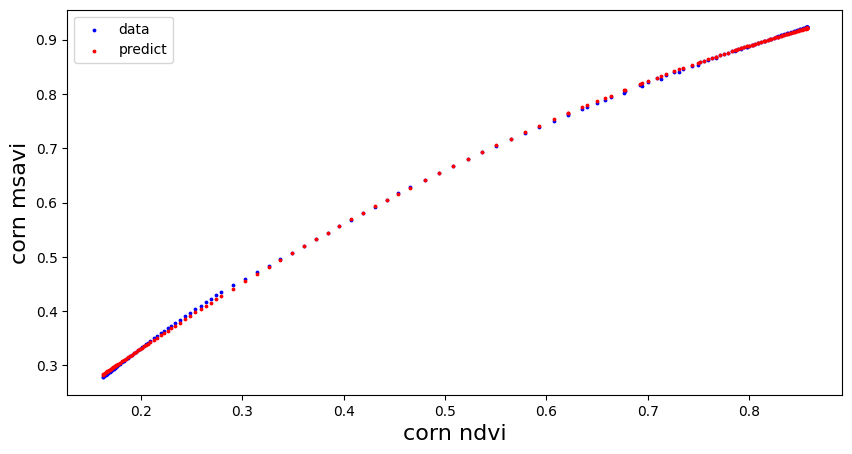

In [208]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = ndvi_corn13[:,np.newaxis]
poly_regression.fit(x_input, msavi_corn13)
y_hat5 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(ndvi_corn13, msavi_corn13, s = 3, color='blue')
predict = plt.scatter(ndvi_corn13, y_hat5, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))


plt.xlabel('corn ndvi', fontsize=16)
plt.ylabel('corn msavi', fontsize=16)
plt.show()

In [209]:
r2_score(msavi_corn13, y_hat5)

0.9998944478939757

In [210]:
mean_squared_error(msavi_corn13, y_hat5)

6.69188018304295e-06

### NDVI vs MSAVI for Cotton

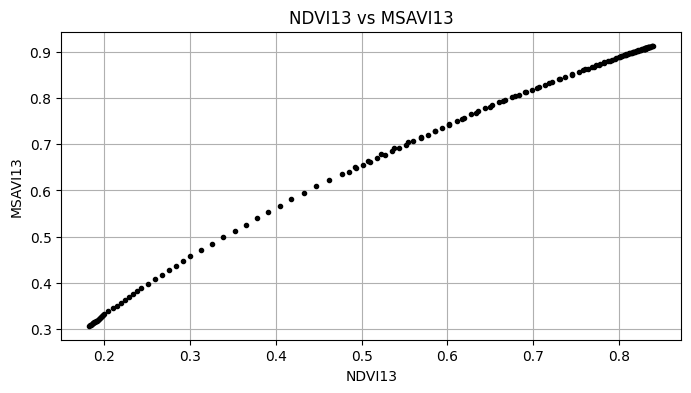

In [211]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_cotton13, msavi_cotton13, "k.")
plt.title("NDVI13 vs MSAVI13")
plt.grid()

plt.xlabel("NDVI13")
plt.ylabel("MSAVI13");

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\2803238136.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = ndvi_cotton13[:,np.newaxis]


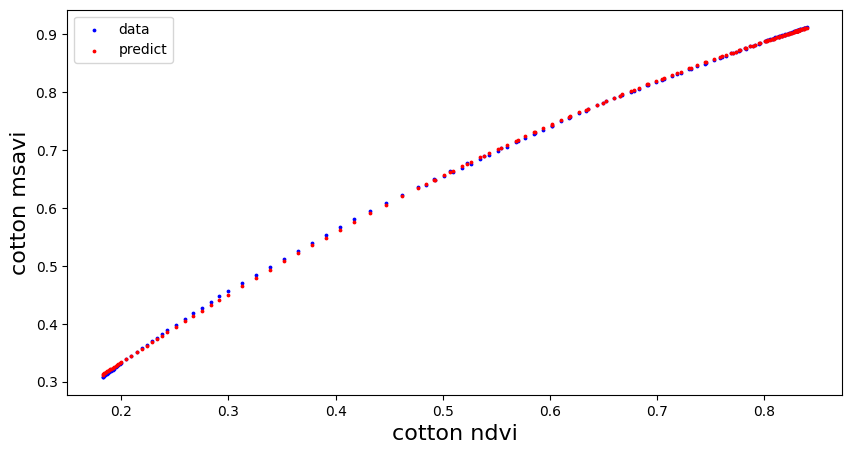

In [212]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = ndvi_cotton13[:,np.newaxis]
poly_regression.fit(x_input, msavi_cotton13)
y_hat6 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(ndvi_cotton13, msavi_cotton13, s = 3, color='blue')
predict = plt.scatter(ndvi_cotton13, y_hat6, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))


plt.xlabel('cotton ndvi', fontsize=16)
plt.ylabel('cotton msavi', fontsize=16)
plt.show()

In [213]:
r2_score(msavi_cotton13, y_hat6)

0.9998781284314084

In [214]:
mean_squared_error(msavi_cotton13, y_hat6)

5.358951522621554e-06

### NDVI vs MSAVI for Soybean

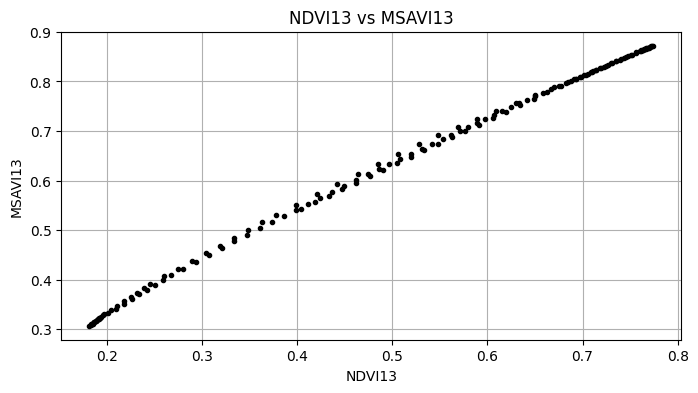

In [238]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_soybean13, msavi_soybean13, "k.")
plt.title("NDVI13 vs MSAVI13")
plt.grid()

plt.xlabel("NDVI13")
plt.ylabel("MSAVI13");

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\3416574034.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = ndvi_soybean13[:,np.newaxis]


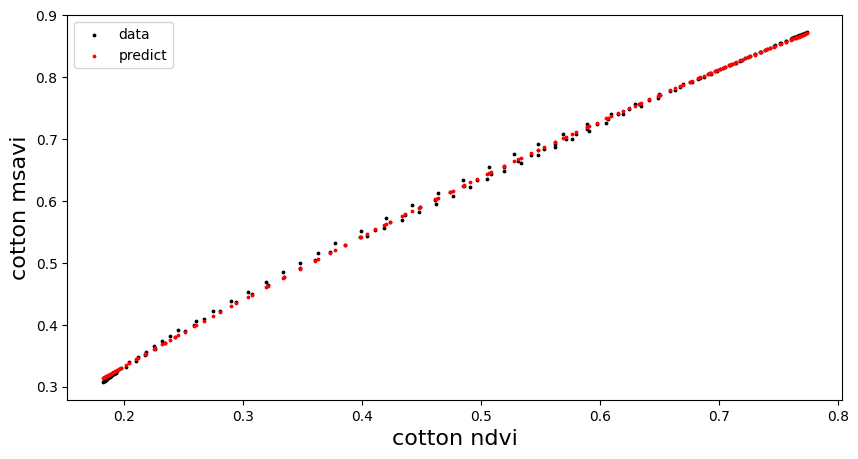

In [240]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = ndvi_soybean13[:,np.newaxis]
poly_regression.fit(x_input, msavi_soybean13)
y_hat11 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(ndvi_soybean13, msavi_soybean13, s = 3, color='k')
predict = plt.scatter(ndvi_soybean13, y_hat11, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))


plt.xlabel('cotton ndvi', fontsize=16)
plt.ylabel('cotton msavi', fontsize=16)
plt.show()

In [241]:
r2_score(msavi_soybean13, y_hat11)

0.9994883530111007

In [242]:
mean_squared_error(msavi_soybean13, y_hat11)

1.8704325982276453e-05

# QUESTION 3

### NDVI13 vs NDVI14 Corn

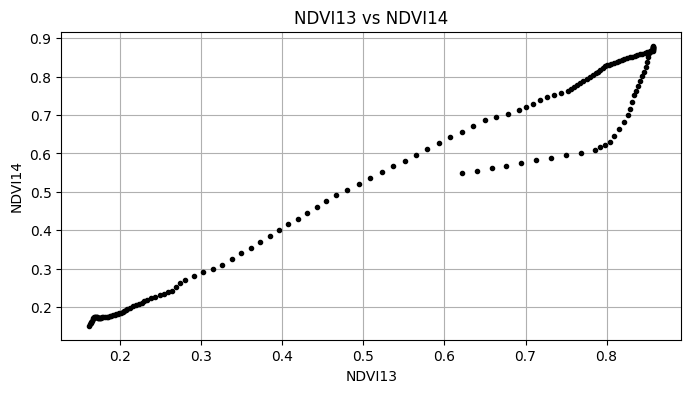

In [215]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_corn13, ndvi_corn14, "k.")
plt.title("NDVI13 vs NDVI14")
plt.grid()

plt.xlabel("NDVI13")
plt.ylabel("NDVI14");

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\1688085777.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = ndvi_corn13[:,np.newaxis]


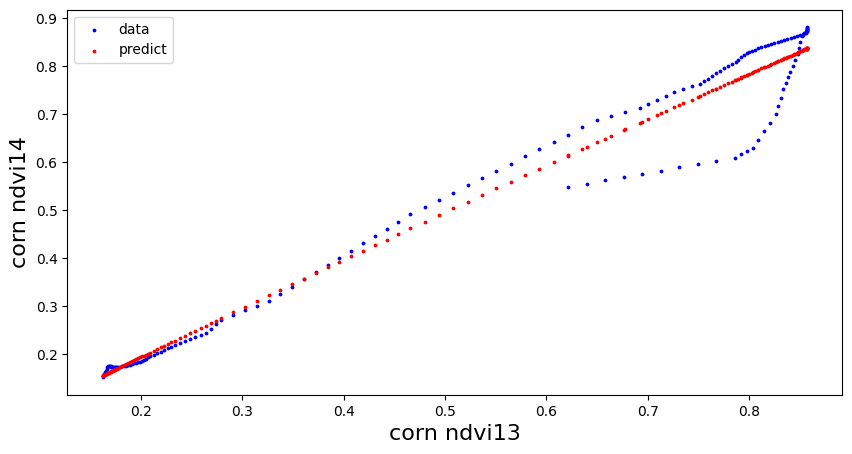

In [224]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = ndvi_corn13[:,np.newaxis]
poly_regression.fit(x_input, ndvi_corn14)
y_hat7 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(ndvi_corn13, ndvi_corn14, s = 3, color='blue')
predict = plt.scatter(ndvi_corn13, y_hat7, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))


plt.xlabel('corn ndvi13', fontsize=16)
plt.ylabel('corn ndvi14', fontsize=16)
plt.show()

As can be seen from the graph, it does not seem reasonable to estimate the ndvi 2013 corn data and the ndvi 2014 corn data.

In [225]:
r2_score(ndvi_corn14, y_hat7)

0.9666714142895432

In [226]:
mean_squared_error(ndvi_corn14, y_hat7)

0.0024837481608852275

### NDVI13 vs MSAVI14 for Corn

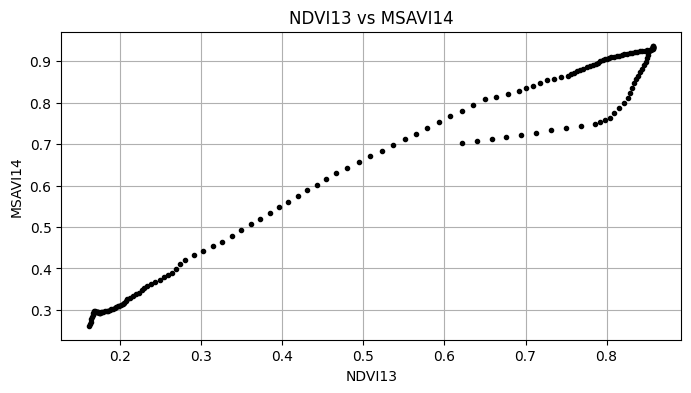

In [227]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_corn13, msavi_corn14, "k.")
plt.title("NDVI13 vs MSAVI14")
plt.grid()

plt.xlabel("NDVI13")
plt.ylabel("MSAVI14");

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\2368050762.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = ndvi_corn13[:,np.newaxis]


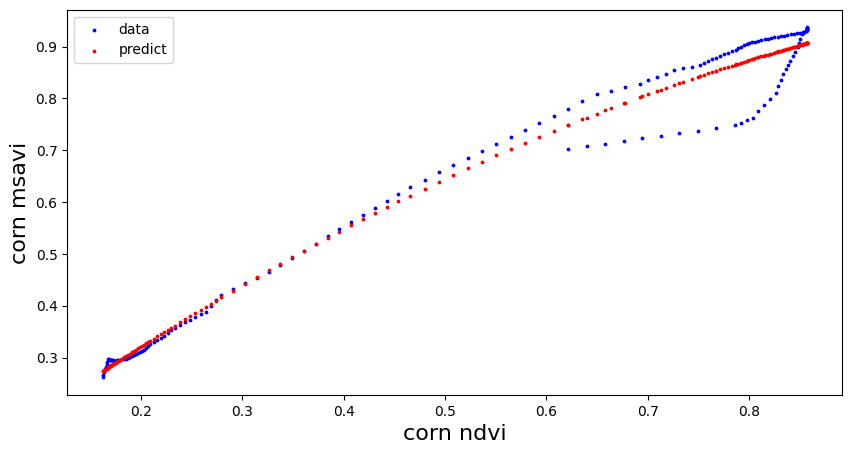

In [228]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = ndvi_corn13[:,np.newaxis]
poly_regression.fit(x_input, msavi_corn14)
y_hat8 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(ndvi_corn13, msavi_corn14, s = 3, color='blue')
predict = plt.scatter(ndvi_corn13, y_hat8, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))


plt.xlabel('corn ndvi', fontsize=16)
plt.ylabel('corn msavi', fontsize=16)
plt.show()

In [229]:
r2_score(msavi_corn14, y_hat8)

0.9793292691392348

In [230]:
mean_squared_error(msavi_corn14, y_hat8)

0.001313896272753892

As can be seen from the graph, it does not seem reasonable to estimate the ndvi 2013 corn data and the msavi 2014 corn data.

### NDVI13 vs MSAVI14 for Cotton

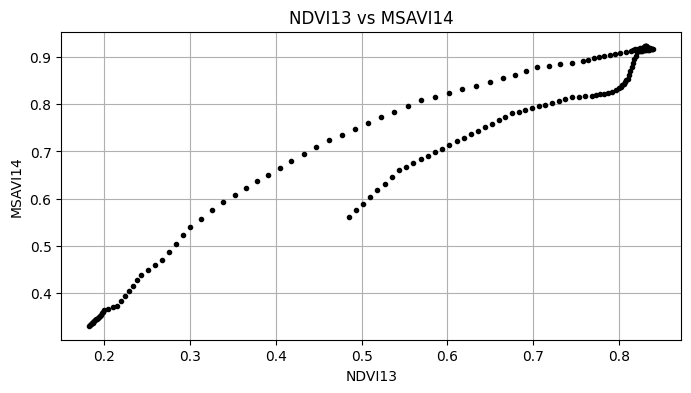

In [231]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_cotton13, msavi_cotton14, "k.")
plt.title("NDVI13 vs MSAVI14")
plt.grid()

plt.xlabel("NDVI13")
plt.ylabel("MSAVI14");

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\2094431234.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = ndvi_cotton13[:,np.newaxis]


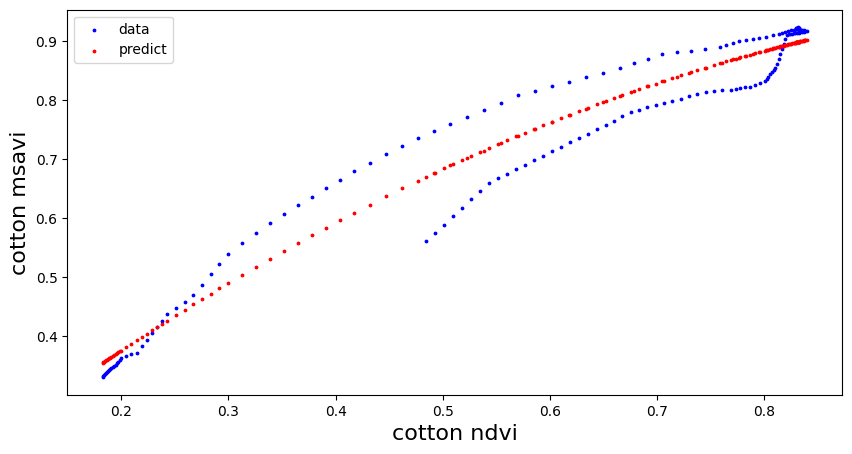

In [232]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = ndvi_cotton13[:,np.newaxis]
poly_regression.fit(x_input, msavi_cotton14)
y_hat9 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(ndvi_cotton13, msavi_cotton14, s = 3, color='blue')
predict = plt.scatter(ndvi_cotton13, y_hat9, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))


plt.xlabel('cotton ndvi', fontsize=16)
plt.ylabel('cotton msavi', fontsize=16)
plt.show()

In [233]:
r2_score(msavi_cotton14, y_hat9)

0.9528725608451994

In [234]:
mean_squared_error(msavi_cotton14, y_hat9)

0.001808498149483987

As can be seen from the graph, it does not seem reasonable to estimate the ndvi 2013 cotton data and the msavi 2014 cotton data.

### NDVI13 vs NDVI14 Cotton

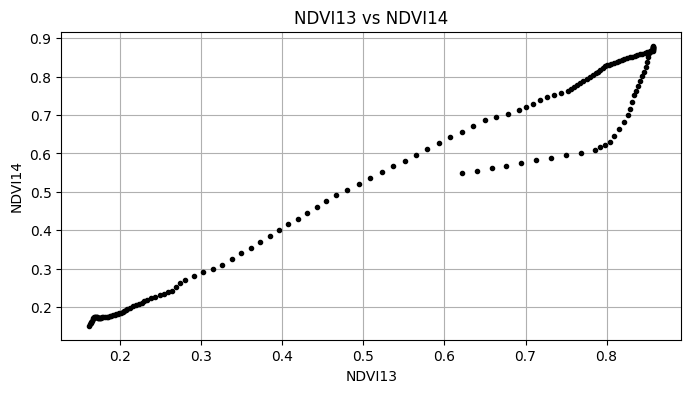

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_cotton13, ndvi_cotton14, "k.")
plt.title("NDVI13 vs NDVI14")
plt.grid()

plt.xlabel("NDVI13")
plt.ylabel("NDVI14");

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\2568409886.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = ndvi_cotton13[:,np.newaxis]


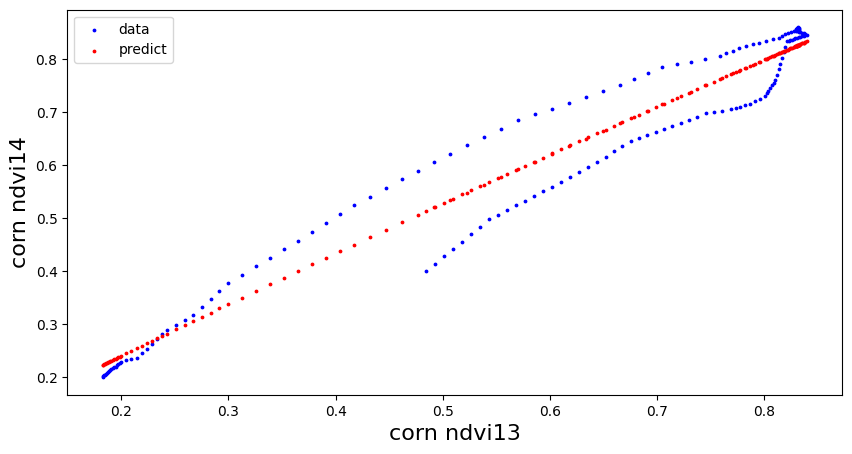

In [235]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = ndvi_cotton13[:,np.newaxis]
poly_regression.fit(x_input, ndvi_cotton14)
y_hat10 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(ndvi_cotton13, ndvi_cotton14, s = 3, color='blue')
predict = plt.scatter(ndvi_cotton13, y_hat10, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))


plt.xlabel('corn ndvi13', fontsize=16)
plt.ylabel('corn ndvi14', fontsize=16)
plt.show()

As can be seen from the graph, it does not seem reasonable to estimate the ndvi 2013 cotton data and the ndvi 2014 cotton data.

In [236]:
r2_score(ndvi_cotton14, y_hat10)

0.9465584297043231

In [237]:
mean_squared_error(ndvi_cotton14, y_hat10)

0.002607466857580602

### NDVI13 vs NDVI14 Soybean

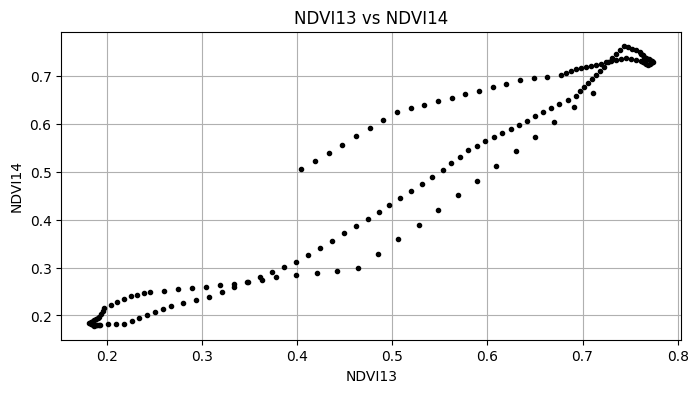

In [243]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_soybean13, ndvi_soybean14, "k.")
plt.title("NDVI13 vs NDVI14")
plt.grid()

plt.xlabel("NDVI13")
plt.ylabel("NDVI14");

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\40827252.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = ndvi_soybean13[:,np.newaxis]


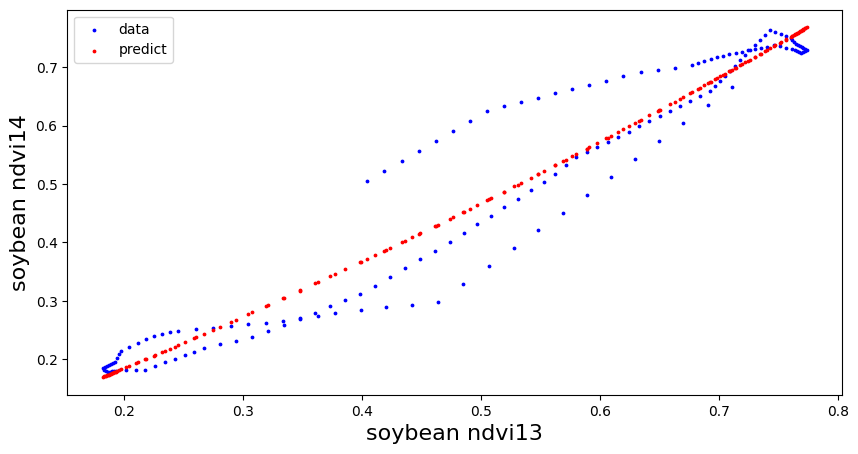

In [249]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = ndvi_soybean13[:,np.newaxis]
poly_regression.fit(x_input, ndvi_soybean14)
y_hat12 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(ndvi_soybean13, ndvi_soybean14, s = 3, color='blue')
predict = plt.scatter(ndvi_soybean13, y_hat12, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))


plt.xlabel('soybean ndvi13', fontsize=16)
plt.ylabel('soybean ndvi14', fontsize=16)
plt.show()

As can be seen from the graph, it does not seem reasonable to estimate the ndvi 2013 soybean data and the ndvi 2014 soybean data.

In [250]:
r2_score(ndvi_soybean14, y_hat12)

0.9302592968874144

In [246]:
mean_squared_error(ndvi_soybean14, y_hat12)

0.0031781259830265685

### NDVI13 vs MSAVI14 for Soybean


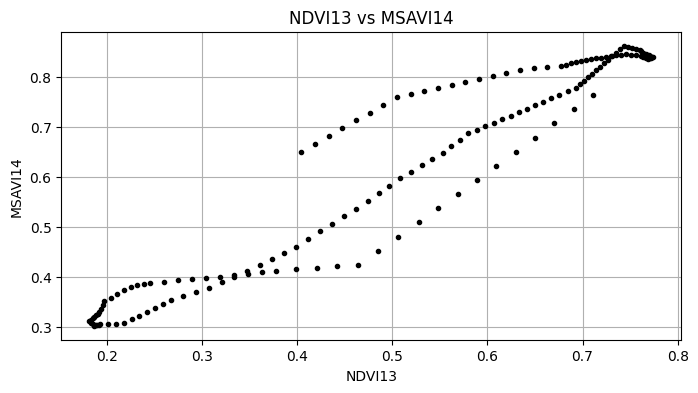

In [255]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_soybean13, msavi_soybean14, "k.")
plt.title("NDVI13 vs MSAVI14")
plt.grid()

plt.xlabel("NDVI13")
plt.ylabel("MSAVI14");

C:\Users\sertac\AppData\Local\Temp\ipykernel_19744\3215675991.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_input = ndvi_soybean13[:,np.newaxis]


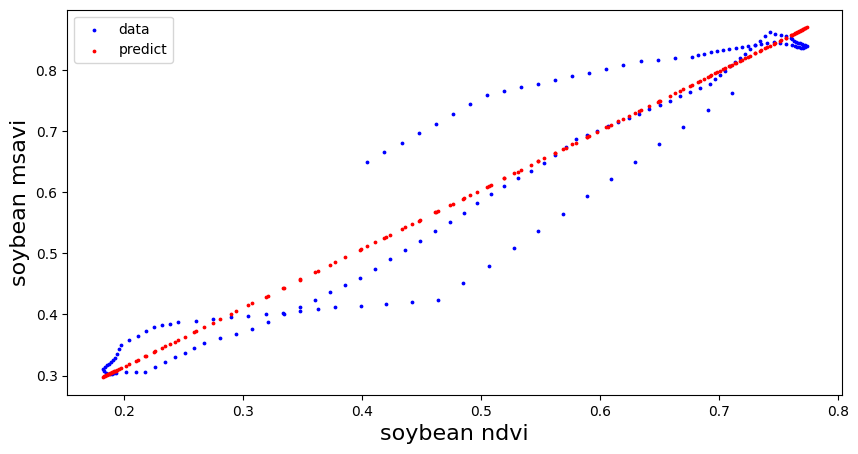

In [252]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = ndvi_soybean13[:,np.newaxis]
poly_regression.fit(x_input, msavi_soybean14)
y_hat13 = poly_regression.predict(x_input)


plt.figure(figsize=(10, 5))
data = plt.scatter(ndvi_soybean13, msavi_soybean14, s = 3, color='blue')
predict = plt.scatter(ndvi_soybean13, y_hat13, s = 3, color='red')

plt.legend((data, predict), ("data", "predict"))


plt.xlabel('soybean ndvi', fontsize=16)
plt.ylabel('soybean msavi', fontsize=16)
plt.show()

In [254]:
r2_score(msavi_soybean14, y_hat13)

0.9204737787739795

In [253]:
mean_squared_error(msavi_soybean14, y_hat13)

0.0033402800972035388

As can be seen from the graph, it does not seem reasonable to estimate the ndvi 2013 soybean data and the msavi 2014 soybean data.

# DISCUSSIONS

Polynomial regression is a form of Linear regression where only due to the Non-linear relationship between dependent and independent variables we add some polynomial terms to linear regression to convert it into Polynomial regression.

Suppose we have X as Independent data and Y as dependent data. Before feeding data to a mode in preprocessing stage we convert the input variables into polynomial terms using some degree.

Consider an example my input value is 35 and the degree of a polynomial is 2 so I will find 35 power 0, 35 power 1, and 35 power 2 And this helps to interpret the non-linear relationship in data.
The equation of polynomial becomes something like this.

                 y = a0 + a1x1 + a2x12 + … + anx1n

The degree of order which to use is a Hyperparameter, and we need to choose it wisely. But using a high degree of polynomial tries to overfit the data and for smaller values of degree, the model tries to underfit so we need to find the optimum value of a degree.

If you see the equation of polynomial regression carefully, then we can see that we are trying to estimate the relationship between coefficients and y. And the values of x and y are already given to us, only we need to determine coefficients and the degree of coefficient here is 1 only, and degree one represents simple linear regression Hence, Polynomial regression is also known as polynomial Linear regression. And this is only the simple concept behind this. I hope you got the point right?

Now we know how polynomial regression works and helps to build a model over non-linear data. Let’s compare both the algorithm practically and see the results.

first I will generate the data using some equation ax^2 + bx + c and then first we will apply simple linear regression to it and then we will apply polynomial regression on top the this which will make an easy comparison between the performance of both the algorithms.

First, we will try only with one input column and one output column and after having a brief understanding we will try it on high dimensional data.

 

This is a problem with a High degree of polynomial is about overfitting 

In this case, r2 score increases up to a point as the degree increases, but then r2 starts to decrease too much because the resulting polynomial takes a strange shape due to the higher degree.

In addition, since a wider range of data is given than the previous assignment, it does not make sense to linear regression on this data, as we mentioned in the previous assignment. So we got better results for polynomial

When we look at the graphs of the 2014 data, which we compared according to NDVI13, we observed that there were no significant results. Therefore, we cannot say that the graphics we fit give a very good result.
Although these results were better in the previous assignment, since the range of our data set was greater in this assignment, the meaninglessness of the data was also greater.

To sum up, Polynomial Regression is a form of Linear regression known as a special case of Multiple linear regression which estimates the relationship as an nth degree polynomial. Polynomial Regression is sensitive to outliers so the presence of one or two outliers can also badly affect the performance.